In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# IMPORTANTE 
 Querido lector en esta tarea se hace uso de la libreria PANDAS para la separación de las variables así que debes tener pandas instalado  en caso de que este no sea el caso, la imagen por default muestra los resultados esperados :3 


In [2]:
def matrixDistribution(n):
    '''
    Esta función crea las n matrices de 2x2 y calcula tanto el determinante como la traza de cada una. 
    Finalmente devuelve los arrays traza y container
    '''
    container = np.random.uniform(low=-1, high=1, size=(n, 2, 2))#crea n matrices de 2x2
    traza = np.trace(container, axis1=1, axis2=2)#calcula el determinante de cada matriz 
    determinant = np.linalg.det(container)#calcula el determinante de cada matriz
    return traza,determinant


In [6]:
n = pow(10,6)#cantidad de matrices 
trazas, determinantes = matrixDistribution(n)
delta = np.power(trazas,2)-4*determinantes#delta que se usa en la figura
pd.set_option("display.precision",16)#presición del dataFrame
vals = pd.DataFrame({'tr': trazas,'dets':determinantes,'delta':delta},columns=['tr', 'dets','delta'])#creación del dataFrame que contiene la info
prop = lambda column: f'{round((len(column)/n)*100,4)}%' #Función lambda para calcular la proporción
#Condiciones para reducir el dataframe según la necesidad
detMay = vals['dets'] > 0
detMen   = vals['dets'] < 0
deltaMen0 = vals['delta'] < 0
deltaMay0 = vals['delta'] > 0
trazaMen0 = vals['tr'] < 0
trazaMay0 = vals['tr'] > 0
pres = 10E-5# 10E-5 funciona mejor que 10E-6 sin embargo al cambiar el 5 por el 6 se siguen produciendo puntos.
#Crear la condición de valor absoluto para los valores que usan el 0
detox =  (vals['dets'].abs()) <= (pres)
trazox = (vals['tr'].abs()) <= (pres)
centers = (vals['tr'].abs()) <= (pres)
delta0 = (vals['delta'].abs()) <= (pres)
#Separar cada rango según las condiciones que tenga
sink = vals[deltaMay0  & trazaMen0 & detMay]
spiralSink = vals[deltaMen0 & trazaMen0 & detMay]
source = vals[deltaMay0 & trazaMay0 & detMay]
spiralSource = vals[deltaMen0 & trazaMay0  & detMay]
degenerateSink = vals[delta0 & trazaMen0]
degenerateSource = vals[delta0 & trazaMay0]
stableFixed = vals[trazaMen0 & detox]
unstableFixed = vals[trazaMay0 & detox]
centers = vals[detox & trazox]
saddle = vals[detMen]


In [7]:
def plotear():
    fig,ax = plt.subplots(1,figsize=(10,7))
    ax.scatter(sink['tr'],sink['dets'],color = '#E3342F',label = f'sink, prop = {prop(sink)}')
    ax.scatter(spiralSink['tr'],spiralSink['dets'],color='#F6993F',label = 'spiral sink , prop ='+ prop(spiralSink))
    ax.scatter(source['tr'],source['dets'],color='#3490DC',label = 'source, prop ='+ prop(source))
    ax.scatter(spiralSource['tr'],spiralSource['dets'],color='#4DC0B5',label = 'spiral source, prop ='+ prop(spiralSource))
    ax.scatter(saddle['tr'],saddle['dets'],color='#00235B',label = 'saddle, prop =' + prop(saddle))
    ax.scatter(stableFixed['tr'],stableFixed['dets'],color='#051AFF',label = 'stable fixed, prop = ' + prop(stableFixed))
    ax.scatter(unstableFixed['tr'],unstableFixed['dets'],color='#BFB000',label = 'unstable fixed,prop = ' + prop(unstableFixed))
    ax.scatter(degenerateSink['tr'],degenerateSink['dets'],color='#FAE500',label = 'degenerate sink, prop = ' +prop(degenerateSink))
    ax.scatter(degenerateSource['tr'],degenerateSource['dets'],color='#38FF21',label = 'degenerate source, prop = ' + prop(degenerateSource))
    ax.scatter(centers['tr'],centers['dets'],color='#2CFa1F',label = 'center, prop = ' + prop(centers))
    ax.set_xlabel('traza(A)')
    ax.set_ylabel('dets(A)')
    ax.set_title('Poincare Diagram')
    box = ax.get_position()# Dejar la legenda por fuera de la figura
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])# Dejar la legenda por fuera de la figura
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig('poincare.png',format='png')
    return fig,ax

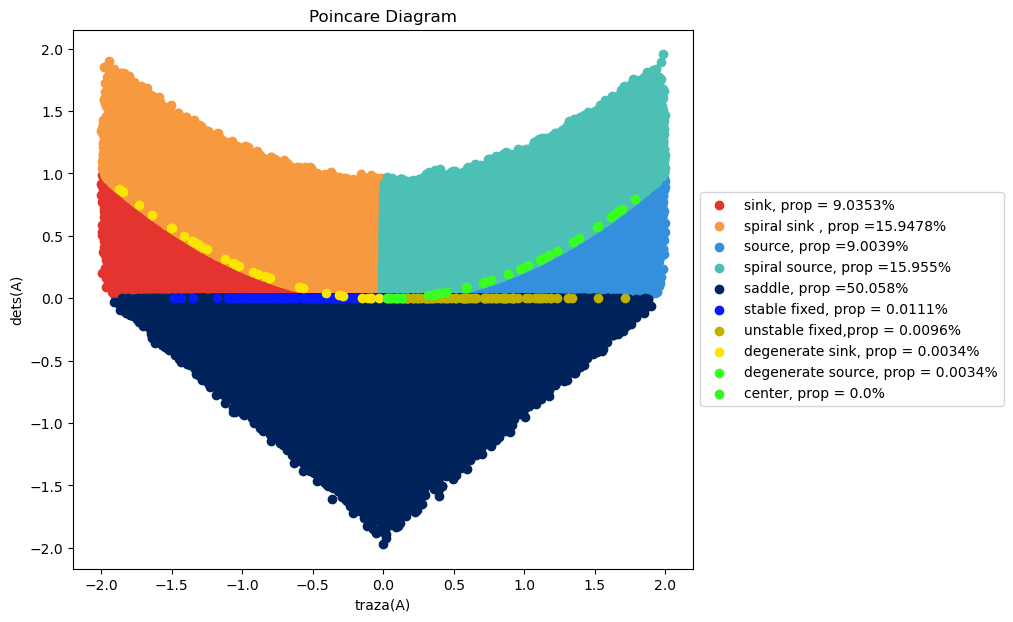

In [8]:
figure,ax = plotear()

plt.show()